In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import os
from sklearn.cluster import KMeans

# Data Preprocessing

In [3]:
data_path = 'data/New diagnosed patients under NPCDCS/'

In [4]:
paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        file_path = os.path.join(root, file)
        paths.append(file_path)

In [5]:
paths = sorted(paths)

In [6]:
def extract_data(path):
    name = path.split("/")[-1].split(".")[0]
    df = pd.read_csv(path)
    df = df[["organisationunitname", "newly diagnosed patients-oral cancer", "newly diagnosed patients-breast cancer_ncd", "newly diagnosed patients-cervical cancer", "newly diagnosed patients-other cancers"]]
    df.loc[28, 'organisationunitname'] = 'NASHIK Circle'
    df['City'] = df['organisationunitname'].apply(lambda x: x.split()[0].upper())
    summed_df = df.groupby('City').sum()
    summed_df.reset_index(inplace=True)
    summed_df.drop(columns= ["organisationunitname"], axis = 1, inplace = True)
    summed_df = summed_df.rename(columns={'City': 'organisationunitname'})
    df = summed_df
    df.loc[df['organisationunitname'] == 'NASIK', 'organisationunitname'] = 'NASHIK'
    df.loc[df['organisationunitname'] == 'AHMADNAGAR', 'organisationunitname'] = 'AHAMADNAGAR'
    df.loc[df['organisationunitname'] == 'AMRAVATI', 'organisationunitname'] = 'AMARAVATI'
    df.loc[df['organisationunitname'] == 'MUMBAI', 'organisationunitname'] = 'MUMBAI CITY'
    df.loc[df['organisationunitname'] == 'OSMANABAD', 'organisationunitname'] = 'USMANABAD'
    df.loc[df['organisationunitname'] == 'RAIGAD', 'organisationunitname'] = 'RAYGAD'
    df.loc[df['organisationunitname'] == 'YEOTMAL', 'organisationunitname'] = 'YAVATMAL'
    cancer_data = df[df['organisationunitname'] != 'MAHARASHTRA']
    cancer_data["total cancer"] = cancer_data.iloc[:, 1] + cancer_data.iloc[:, 2] + cancer_data.iloc[:, 3] + cancer_data.iloc[:, 4]
    cancer_data.rename(columns = {"organisationunitname": "Unit Name", "newly diagnosed patients-oral cancer": f"Oral Cancer- {name}", "newly diagnosed patients-breast cancer_ncd": f"Breast Cancer- {name}", "newly diagnosed patients-cervical cancer": f"Cervical Cancer- {name}", "newly diagnosed patients-other cancers": f"Other Cancers- {name}", "total cancer": f"Total Cancer- {name}"}, inplace = True)
    cancer_data.fillna(0, inplace=True)
    cancer_data.reset_index(inplace = True)
    cancer_data.drop(['index'], axis = 1, inplace = True)
    return cancer_data

In [7]:
df_array = []
for path in paths:
    data = extract_data(path)
    unit_names = data["Unit Name"]
    data.drop(columns = ["Unit Name"], axis = 1, inplace = True)
    df_array.append(data)

total_data = pd.concat(df_array, axis=1)

In [8]:
total_data["TOTAL CANCER ALL"] = total_data["Total Cancer- 2024-1"] + total_data["Total Cancer- 2022-2"] + total_data["Total Cancer- 2022-3"] + total_data["Total Cancer- 2022-1"] + total_data["Total Cancer- 2022-4"] + total_data["Total Cancer- 2023-1"] + total_data["Total Cancer- 2023-2"] + total_data["Total Cancer- 2023-3"] + total_data["Total Cancer- 2023-4"]
total_data["TOTAL BREAST CANCER"] = total_data["Breast Cancer- 2024-1"] + total_data["Breast Cancer- 2022-2"] + total_data["Breast Cancer- 2022-3"] + total_data["Breast Cancer- 2022-1"] + total_data["Breast Cancer- 2022-4"] + total_data["Breast Cancer- 2023-1"] + total_data["Breast Cancer- 2023-2"] + total_data["Breast Cancer- 2023-3"] + total_data["Breast Cancer- 2023-4"]
total_data["TOTAL CERVICAL CANCER"] = total_data["Cervical Cancer- 2024-1"] + total_data["Cervical Cancer- 2022-2"] + total_data["Cervical Cancer- 2022-3"] + total_data["Cervical Cancer- 2022-1"] + total_data["Cervical Cancer- 2022-4"] + total_data["Cervical Cancer- 2023-1"] + total_data["Cervical Cancer- 2023-2"] + total_data["Cervical Cancer- 2023-3"] + total_data["Cervical Cancer- 2023-4"]
total_data["TOTAL ORAL CANCER"] = total_data["Oral Cancer- 2024-1"] + total_data["Oral Cancer- 2022-2"] + total_data["Oral Cancer- 2022-3"] + total_data["Oral Cancer- 2022-1"] + total_data["Oral Cancer- 2022-4"] + total_data["Oral Cancer- 2023-1"] + total_data["Oral Cancer- 2023-2"] + total_data["Oral Cancer- 2023-3"] + total_data["Oral Cancer- 2023-4"]
total_data["TOTAL OTHER CANCERS"] = total_data["Other Cancers- 2024-1"] + total_data["Other Cancers- 2022-2"] + total_data["Other Cancers- 2022-3"] + total_data["Other Cancers- 2022-1"] + total_data["Other Cancers- 2022-4"] + total_data["Other Cancers- 2023-1"] + total_data["Other Cancers- 2023-2"] + total_data["Other Cancers- 2023-3"] + total_data["Other Cancers- 2023-4"]
sorted_columns = sorted(total_data.columns)
total_data = total_data[sorted_columns]
total_data.insert(loc = 0, column = 'Unit Name', value = unit_names)

In [9]:
total_data

,Unit Name,Breast Cancer- 2022-1,Breast Cancer- 2022-2,Breast Cancer- 2022-3,Breast Cancer- 2022-4,Breast Cancer- 2023-1,Breast Cancer- 2023-2,Breast Cancer- 2023-3,Breast Cancer- 2023-4,Breast Cancer- 2024-1,...,TOTAL OTHER CANCERS,Total Cancer- 2022-1,Total Cancer- 2022-2,Total Cancer- 2022-3,Total Cancer- 2022-4,Total Cancer- 2023-1,Total Cancer- 2023-2,Total Cancer- 2023-3,Total Cancer- 2023-4,Total Cancer- 2024-1
0,AHAMADNAGAR,1.0,73.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,...,40.0,10.0,177.0,17.0,4.0,0.0,0.0,6.0,6.0,3.0
1,AKOLA,126.0,25.0,22.0,41.0,17.0,126.0,23.0,4.0,6.0,...,103.0,548.0,93.0,75.0,92.0,100.0,209.0,57.0,30.0,15.0
2,AMARAVATI,111.0,1.0,9.0,26.0,5.0,121.0,8.0,1.0,2.0,...,29.0,486.0,9.0,17.0,42.0,20.0,167.0,28.0,13.0,6.0
3,AURANGABAD,0.0,0.0,19.0,0.0,3.0,0.0,6.0,8.0,0.0,...,18.0,2.0,0.0,52.0,15.0,11.0,48.0,25.0,13.0,1.0
4,BEED,0.0,0.0,0.0,8.0,2.0,2.0,4.0,0.0,2.0,...,12.0,0.0,0.0,0.0,16.0,10.0,6.0,9.0,1.0,2.0
5,BHANDARA,2.0,5.0,5.0,10.0,10.0,11.0,8.0,8.0,2.0,...,100.0,21.0,34.0,38.0,56.0,57.0,72.0,58.0,62.0,13.0
6,BULDHANA,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,20.0,3.0,4.0,0.0
7,CHANDRAPUR,1.0,2.0,4.0,6.0,4.0,2.0,2.0,4.0,1.0,...,33.0,5.0,21.0,14.0,27.0,17.0,18.0,33.0,22.0,6.0
8,DHULE,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,4.0,0.0,2.0,2.0,1.0,9.0,1.0,0.0,3.0,1.0
9,GADCHIROLI,7.0,10.0,7.0,7.0,0.0,6.0,4.0,4.0,1.0,...,55.0,16.0,22.0,31.0,23.0,8.0,56.0,72.0,54.0,12.0


# Quarter-wise increase of cancer

In [62]:
def plot_statistics(total_data, unit_name):   
    unit_number = total_data.index[total_data["Unit Name"] == unit_name.upper()][0]
    quarter = total_data[[col for col in total_data.columns if col.startswith("Oral Cancer")] ]
    values = quarter.iloc[unit_number, :]
    quarter = quarter.columns[:]
    num_bars = len(quarter)

    r1 = np.arange(num_bars)
    
    plt.figure()

    plt.plot(r1, values, label = "Oral Cancer")
    
    quarter = total_data[[col for col in total_data.columns if col.startswith("Breast Cancer")] ]
    values = quarter.iloc[unit_number, :]
    quarter = quarter.columns[:]
    num_bars = len(quarter)

    r1 = np.arange(num_bars)

    plt.plot(r1, values, label = "Breast Cancer")
    
    quarter = total_data[[col for col in total_data.columns if col.startswith("Cervical Cancer")] ]
    values = quarter.iloc[unit_number, :]
    quarter = quarter.columns[:]
    num_bars = len(quarter)

    r1 = np.arange(num_bars)

    plt.plot(r1, values, label = "Cervical Cancer")
    
    quarter = total_data[[col for col in total_data.columns if col.startswith("Other Cancers")] ]
    values = quarter.iloc[unit_number, :]
    quarter = quarter.columns[:]
    num_bars = len(quarter)

    r1 = np.arange(num_bars)

    plt.plot(r1, values, label = "Other Cancers")

    plt.xlabel('Quarter', fontweight='bold')
    plt.ylabel('Values', fontweight='bold')
    
    plt.title(f'Quarter vs Cancers for unit {total_data.iloc[unit_number, 0]}', fontweight='bold')
    
    x_axis = ["2022-1", "2022-2", "2022-3", "2022-4", "22023-1", "2023-2", "2023-3", "2023-4", "2024-1"]

    plt.xticks([r for r in range(num_bars)], x_axis, rotation=60)
    plt.gcf().set_size_inches(15, 5)
    
    plt.legend()

    plt.show()


In [53]:
total_data.columns

Index(['Unit Name', 'Breast Cancer- 2022-1', 'Breast Cancer- 2022-2',
       'Breast Cancer- 2022-3', 'Breast Cancer- 2022-4',
       'Breast Cancer- 2023-1', 'Breast Cancer- 2023-2',
       'Breast Cancer- 2023-3', 'Breast Cancer- 2023-4',
       'Breast Cancer- 2024-1', 'Cervical Cancer- 2022-1',
       'Cervical Cancer- 2022-2', 'Cervical Cancer- 2022-3',
       'Cervical Cancer- 2022-4', 'Cervical Cancer- 2023-1',
       'Cervical Cancer- 2023-2', 'Cervical Cancer- 2023-3',
       'Cervical Cancer- 2023-4', 'Cervical Cancer- 2024-1',
       'Oral Cancer- 2022-1', 'Oral Cancer- 2022-2', 'Oral Cancer- 2022-3',
       'Oral Cancer- 2022-4', 'Oral Cancer- 2023-1', 'Oral Cancer- 2023-2',
       'Oral Cancer- 2023-3', 'Oral Cancer- 2023-4', 'Oral Cancer- 2024-1',
       'Other Cancers- 2022-1', 'Other Cancers- 2022-2',
       'Other Cancers- 2022-3', 'Other Cancers- 2022-4',
       'Other Cancers- 2023-1', 'Other Cancers- 2023-2',
       'Other Cancers- 2023-3', 'Other Cancers- 2023-4',


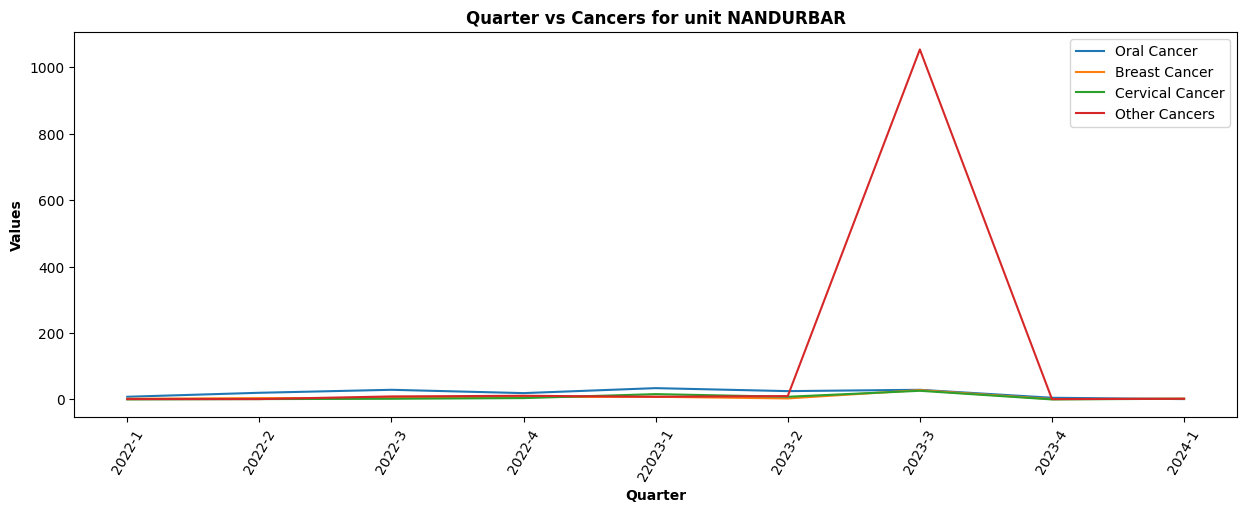

In [66]:
unit_name = "Nandurbar"   # Change this for different units
plot_statistics(total_data,  unit_name)

# Ranking of units by total number of Cancer patients

In [72]:
def rank_based_on_column(df, column_name):
    sorted_df = df.sort_values(by=column_name, ascending = False)
    final_df = pd.DataFrame(sorted_df.iloc[:, 0])
    final_df[column_name] = sorted_df[column_name]
    final_df.reset_index(inplace=True)
    final_df.insert(loc = 0, column = 'Rank', value = final_df.index)
    final_df['Rank'] = final_df['Rank'].apply(lambda x: x + 1)
    final_df.drop(["index"], axis = 1, inplace = True)
    return final_df

In [68]:
total_data.columns

Index(['Unit Name', 'Breast Cancer- 2022-1', 'Breast Cancer- 2022-2',
       'Breast Cancer- 2022-3', 'Breast Cancer- 2022-4',
       'Breast Cancer- 2023-1', 'Breast Cancer- 2023-2',
       'Breast Cancer- 2023-3', 'Breast Cancer- 2023-4',
       'Breast Cancer- 2024-1', 'Cervical Cancer- 2022-1',
       'Cervical Cancer- 2022-2', 'Cervical Cancer- 2022-3',
       'Cervical Cancer- 2022-4', 'Cervical Cancer- 2023-1',
       'Cervical Cancer- 2023-2', 'Cervical Cancer- 2023-3',
       'Cervical Cancer- 2023-4', 'Cervical Cancer- 2024-1',
       'Oral Cancer- 2022-1', 'Oral Cancer- 2022-2', 'Oral Cancer- 2022-3',
       'Oral Cancer- 2022-4', 'Oral Cancer- 2023-1', 'Oral Cancer- 2023-2',
       'Oral Cancer- 2023-3', 'Oral Cancer- 2023-4', 'Oral Cancer- 2024-1',
       'Other Cancers- 2022-1', 'Other Cancers- 2022-2',
       'Other Cancers- 2022-3', 'Other Cancers- 2022-4',
       'Other Cancers- 2023-1', 'Other Cancers- 2023-2',
       'Other Cancers- 2023-3', 'Other Cancers- 2023-4',


In [73]:
rank_based_on_column(total_data, 'TOTAL CANCER ALL')   # Change the input for rankings based on the input

,Rank,Unit Name,TOTAL CANCER ALL
0,1,NASHIK,2688.0
1,2,KOLHAPUR,2010.0
2,3,NANDURBAR,1385.0
3,4,PUNE,1263.0
4,5,AKOLA,1219.0
5,6,NAGPUR,998.0
6,7,AMARAVATI,788.0
7,8,SATARA,569.0
8,9,BHANDARA,411.0
9,10,WASHIM,359.0


# PCA for removing correlation, K-means clustering to determine overall load of all cancers on units

Removing Very Low Load units

In [16]:
n = 100
print(len(total_data[total_data["TOTAL CANCER ALL"] < n]["TOTAL CANCER ALL"]))
total_data[total_data["TOTAL CANCER ALL"] < n]["TOTAL CANCER ALL"]

16


4     44.0
6     27.0
8     19.0
10    37.0
11     1.0
12     5.0
13    51.0
21    71.0
22     1.0
23    23.0
25    17.0
27     4.0
30    42.0
31    87.0
32    87.0
34     5.0
Name: TOTAL CANCER ALL, dtype: float64

In [17]:
filtered_total_data = total_data[total_data["TOTAL CANCER ALL"] >= n]

In [18]:
filtered_columns = [col for col in filtered_total_data.columns if col.startswith('TOTAL')]
filtered_columns = ['Unit Name'] + filtered_columns
df_filtered = filtered_total_data[filtered_columns]
df_filtered.drop(['TOTAL CANCER ALL'], axis = 1, inplace = True)

df_filtered.set_index('Unit Name', inplace=True)

#####

# Removing outlier

df_filtered.drop("NANDURBAR", inplace = True, axis = 0)
df_filtered.drop("NASHIK", inplace = True, axis = 0)

######

max_vals = df_filtered.max()

df_filtered = df_filtered.div(max_vals)


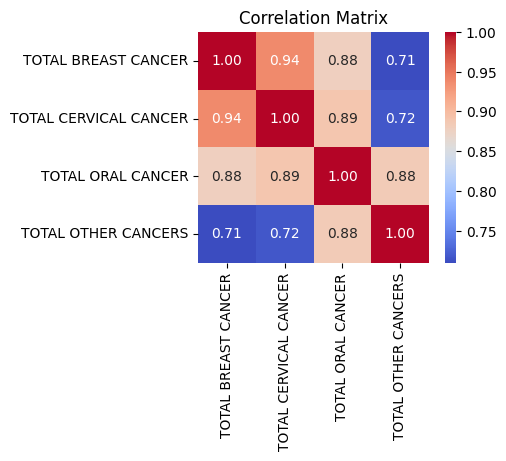

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


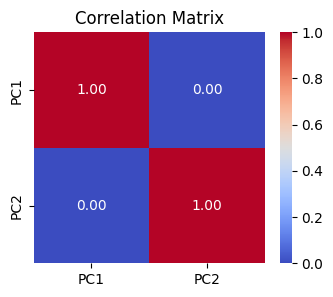

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_filtered)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"], index = df_filtered.index)

# Calculate the correlation matrix
correlation_matrix = df_pca.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_pca)

cluster_labels = kmeans.labels_

df_pca['Cluster'] = cluster_labels
new_labels = {0: 'Low', 1: 'Medium', 2: 'High'}
df_pca['Cluster'] = [new_labels[label] for label in cluster_labels]
df_filtered['Cluster'] = cluster_labels
df_filtered['Cluster'] = [new_labels[label] for label in cluster_labels]

df_pca.sort_values(by='Cluster')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,Cluster
Unit Name,,,
KOLHAPUR,1.432214,-0.040115,High
AHAMADNAGAR,-0.313666,-0.052633,Low
SATARA,-0.035728,0.058125,Low
RATNAGIRI,-0.353039,0.050717,Low
NANDED,-0.445484,-0.044046,Low
MUMBAI CITY,-0.449035,-0.021736,Low
SINDHUDURG,-0.256691,0.058569,Low
LATUR,-0.230746,-0.043094,Low
CHANDRAPUR,-0.399075,0.000674,Low


/var/folders/41/13h1j2zj3plb9jjbs7dzx75c0000gn/T/ipykernel_17421/2581570958.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (data['PC1'][i], data['PC2'][i]), fontsize=8)


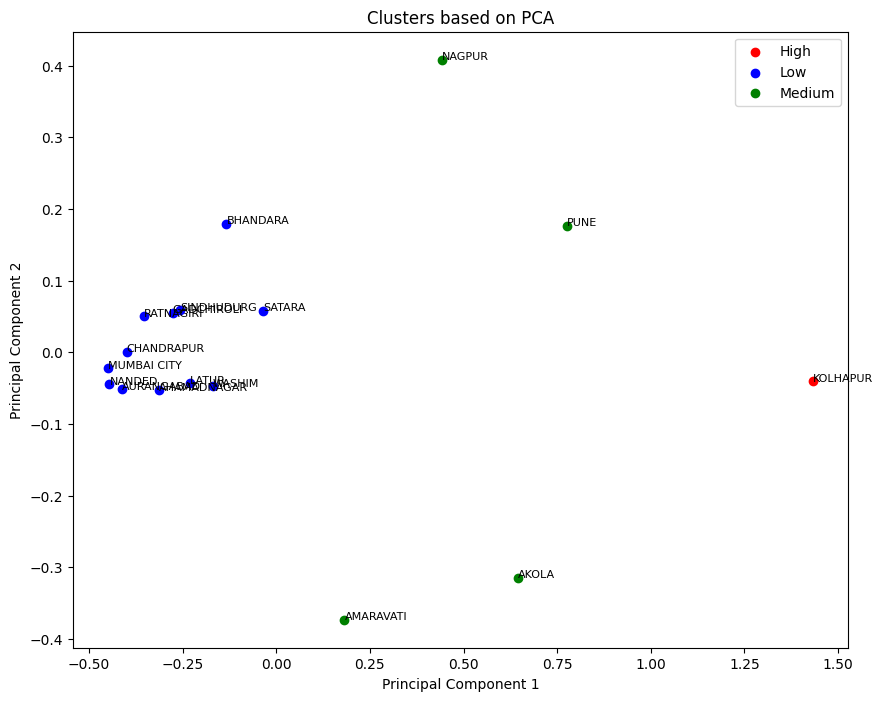

In [22]:
data = df_pca

high = data[data['Cluster'] == 'High']
low = data[data['Cluster'] == 'Low']
medium = data[data['Cluster'] == 'Medium']

plt.figure(figsize=(10, 8))

plt.scatter(high['PC1'], high['PC2'], color='red', label='High')
plt.scatter(low['PC1'], low['PC2'], color='blue', label='Low')
plt.scatter(medium['PC1'], medium['PC2'], color='green', label='Medium')

for i, txt in enumerate(data.index):
    plt.annotate(txt, (data['PC1'][i], data['PC2'][i]), fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on PCA')

plt.legend()

plt.show()

In [23]:
total_data.set_index('Unit Name', inplace=True)
total_data["Overall Load for all Cancers"] = df_pca['Cluster']

total_data["Overall Load for all Cancers"].fillna("Very Low", inplace = True)
total_data = total_data.reset_index().rename(columns={'index': 'Unit Name'})
######

# Taking care of Outlier  ("Manually alotting the cluster")
total_data.loc[19, "Overall Load for all Cancers"] = "Medium" 
total_data.loc[20, "Overall Load for all Cancers"] = "High" 

#####

In [24]:
data = [col for col in total_data.columns if col.startswith('TOTAL')]
data = ['Unit Name'] + data + ['Overall Load for all Cancers']
data = total_data[data]
x = data['TOTAL CANCER ALL']
data.drop(['TOTAL CANCER ALL'], axis = 1, inplace = True)
data['TOTAL CANCER ALL'] = x

data.sort_values(by='Overall Load for all Cancers')

,Unit Name,TOTAL BREAST CANCER,TOTAL CERVICAL CANCER,TOTAL ORAL CANCER,TOTAL OTHER CANCERS,Overall Load for all Cancers,TOTAL CANCER ALL
20,NASHIK,263.0,182.0,1019.0,1224.0,High,2688.0
14,KOLHAPUR,449.0,446.0,868.0,247.0,High,2010.0
0,AHAMADNAGAR,80.0,30.0,73.0,40.0,Low,223.0
29,SINDHUDURG,74.0,30.0,68.0,74.0,Low,246.0
28,SATARA,96.0,65.0,331.0,77.0,Low,569.0
3,AURANGABAD,36.0,12.0,101.0,18.0,Low,167.0
26,RATNAGIRI,49.0,7.0,53.0,57.0,Low,166.0
5,BHANDARA,61.0,30.0,220.0,100.0,Low,411.0
7,CHANDRAPUR,26.0,16.0,88.0,33.0,Low,163.0
9,GADCHIROLI,46.0,22.0,171.0,55.0,Low,294.0


In [25]:
variance_ratio = pca.explained_variance_ratio_

total_var = variance_ratio[0] + variance_ratio[1]
print("Total variance captured by the Principle components: ", total_var)

Total variance captured by the Principle components:  0.9713251551600948


# Plotting on the Maharashtra Map

In [26]:
import geopandas as gpd
import os
import pandas as pd
import folium
import numpy as np
from fastkml import kml
import xml.etree.ElementTree as ET
import shapely
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
def parse_kml(kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()
    
    district_data = []
    for placemark in root.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        organisationunitname = placemark.findtext('.//{http://www.opengis.net/kml/2.2}name')
        extended_data = placemark.find('.//{http://www.opengis.net/kml/2.2}ExtendedData')
        district_id = extended_data.findtext('.//{http://www.opengis.net/kml/2.2}SimpleData[@name="DISTRICT_L"]')
        state = extended_data.findtext('.//{http://www.opengis.net/kml/2.2}SimpleData[@name="STATE"]')
        
        coordinates = placemark.find('.//{http://www.opengis.net/kml/2.2}coordinates').text.strip()
        coordinates_list = [tuple(map(float, coord.split(','))) for coord in coordinates.split()]
        polygon = Polygon(coordinates_list)
        
        district_data.append({
            'Unit Name': organisationunitname,
            'district_id': district_id,
            'state': state,
            'geometry': polygon
        })
    df = pd.DataFrame(district_data)
    df = df.drop(31, axis = 0)
    df.reset_index(drop = True, inplace  = True)
    
    return df

maharashtra_districts = parse_kml('maharashtra.kml')

In [28]:
def plot_on_map(column_name):
    df = maharashtra_districts

    df[column_name] = total_data[column_name]

    gdf = gpd.GeoDataFrame(df, crs='EPSG:4326')
    
    gdf = gdf.to_crs('EPSG:3395')

    fig, ax = plt.subplots(figsize=(20, 10))
    gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

    gdf.plot(ax=ax, column=column_name, cmap='Reds', legend=True, markersize=gdf[column_name]*2, alpha=0.5)

    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Unit Name']):
        ax.annotate(label, xy=(x, y), xytext=(-15,-5), textcoords="offset points", fontsize=8, color='black')

    plt.title(column_name)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [29]:
total_data.columns

Index(['Unit Name', 'Breast Cancer- 2022-1', 'Breast Cancer- 2022-2',
       'Breast Cancer- 2022-3', 'Breast Cancer- 2022-4',
       'Breast Cancer- 2023-1', 'Breast Cancer- 2023-2',
       'Breast Cancer- 2023-3', 'Breast Cancer- 2023-4',
       'Breast Cancer- 2024-1', 'Cervical Cancer- 2022-1',
       'Cervical Cancer- 2022-2', 'Cervical Cancer- 2022-3',
       'Cervical Cancer- 2022-4', 'Cervical Cancer- 2023-1',
       'Cervical Cancer- 2023-2', 'Cervical Cancer- 2023-3',
       'Cervical Cancer- 2023-4', 'Cervical Cancer- 2024-1',
       'Oral Cancer- 2022-1', 'Oral Cancer- 2022-2', 'Oral Cancer- 2022-3',
       'Oral Cancer- 2022-4', 'Oral Cancer- 2023-1', 'Oral Cancer- 2023-2',
       'Oral Cancer- 2023-3', 'Oral Cancer- 2023-4', 'Oral Cancer- 2024-1',
       'Other Cancers- 2022-1', 'Other Cancers- 2022-2',
       'Other Cancers- 2022-3', 'Other Cancers- 2022-4',
       'Other Cancers- 2023-1', 'Other Cancers- 2023-2',
       'Other Cancers- 2023-3', 'Other Cancers- 2023-4',


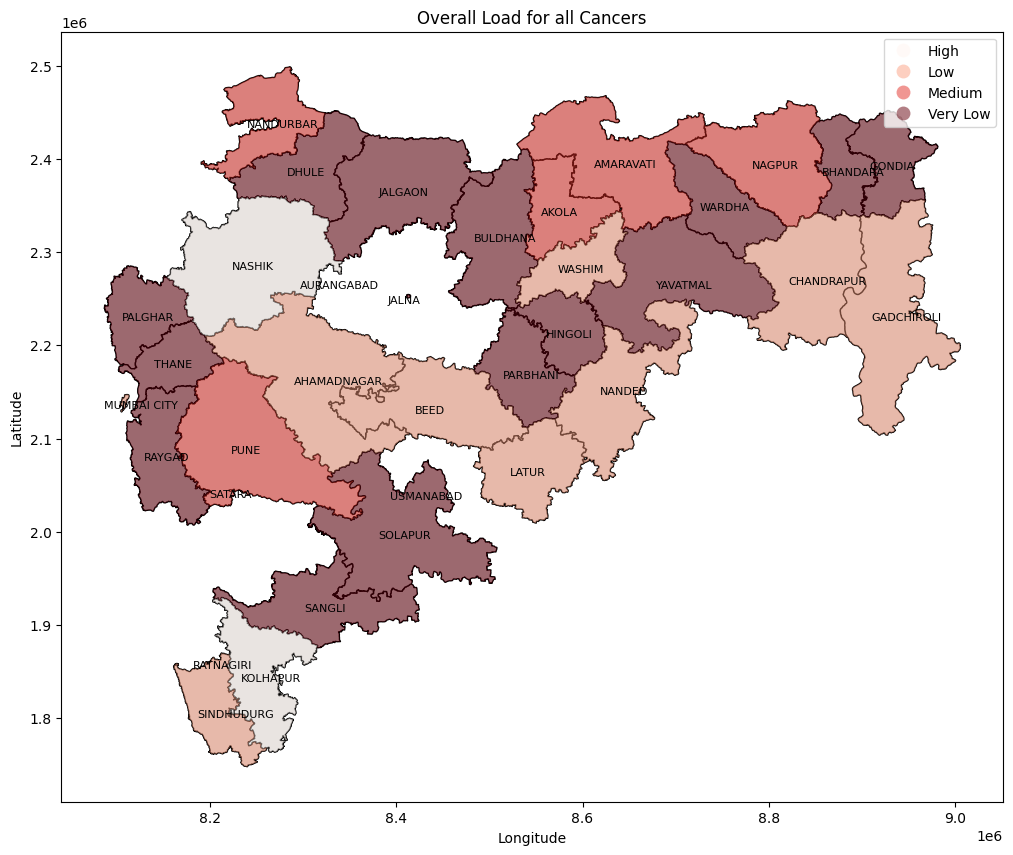

In [30]:
plot_on_map('Overall Load for all Cancers')   # Input the name of the statistics to be plot on map

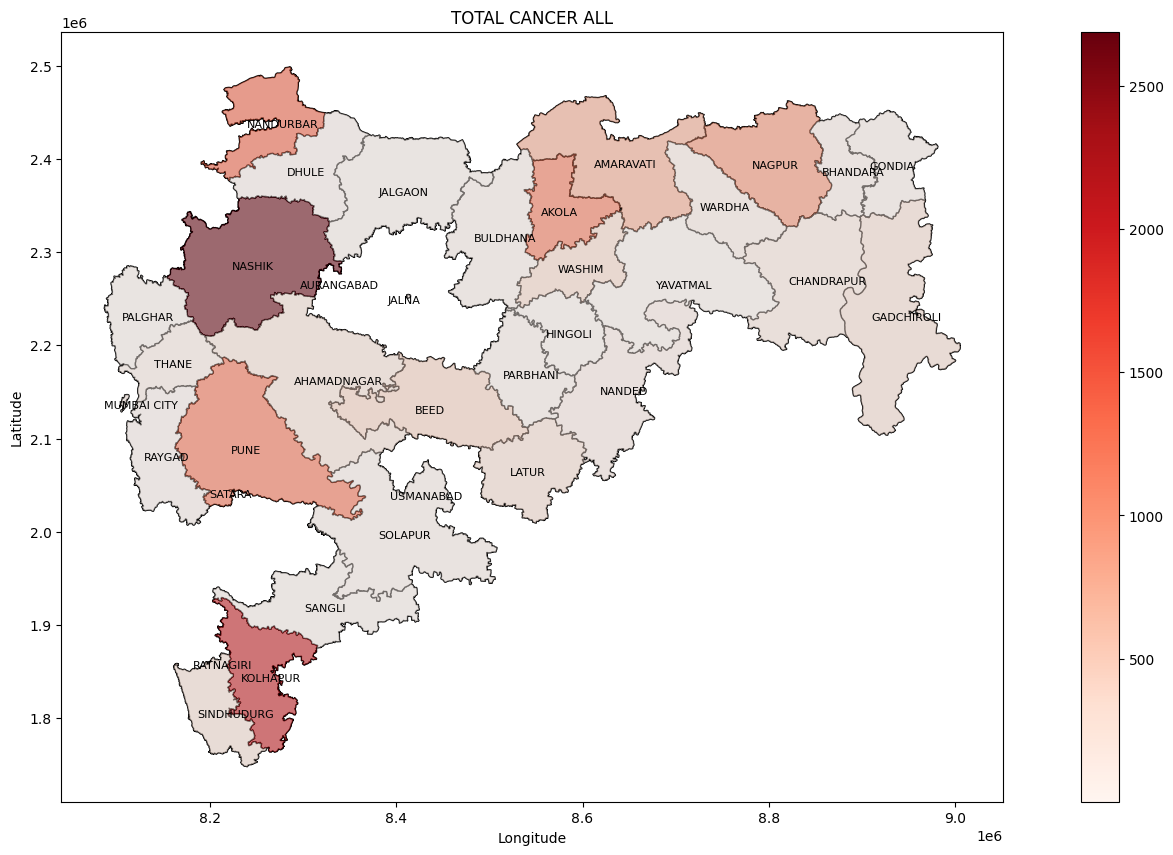

In [39]:
plot_on_map('TOTAL CANCER ALL')   # Input the name of the statistics to be plot on map